# Hand pose

In [1]:
##############################################################################
#                                                                            #
# Copyright (c) Borja García Quiroga, All Rights Reserved.                   #
#                                                                            #
# The information and material provided below was developed as complementary #
# materials to the dissertation submitted as partial requirements for the    #
# MSc in Computer Science at Trinity College Dublin, Ireland.                #
#                                                                            #
##############################################################################

In [2]:
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch.optim as optim
from datasets import FreiHand
from funcs import show_data, IoULoss
from models import ShallowUNet
from trainers import Trainer
from variables import NUM_OF_CHANNELS, NUM_OF_KEYPOINTS

## Training

In [3]:
# Training parameters.
config = {
    "data_dir": "/Users/borjagq/Desktop/HandData/31000_31000_31000_31000_1_1_1_1_31000",
    "epochs": 1000,
    "batch_size": 48,
    "batches_per_epoch": 50,
    "batches_per_epoch_val": 20,
    "learning_rate": 0.1,
   #"device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    "device": "mps",
}

In [4]:
import torch.mps
torch.mps.set_per_process_memory_fraction(0.8)

In [5]:
# Training dataset.
train_dataset = FreiHand(config=config, dataset_type="train")
train_dataloader = DataLoader(
    train_dataset, config["batch_size"], shuffle=True, drop_last=True, num_workers=2
)

# Validation dataset.
val_dataset = FreiHand(config=config, dataset_type="val")
val_dataloader = DataLoader(
    val_dataset, config["batch_size"], shuffle=True, drop_last=True, num_workers=2
)

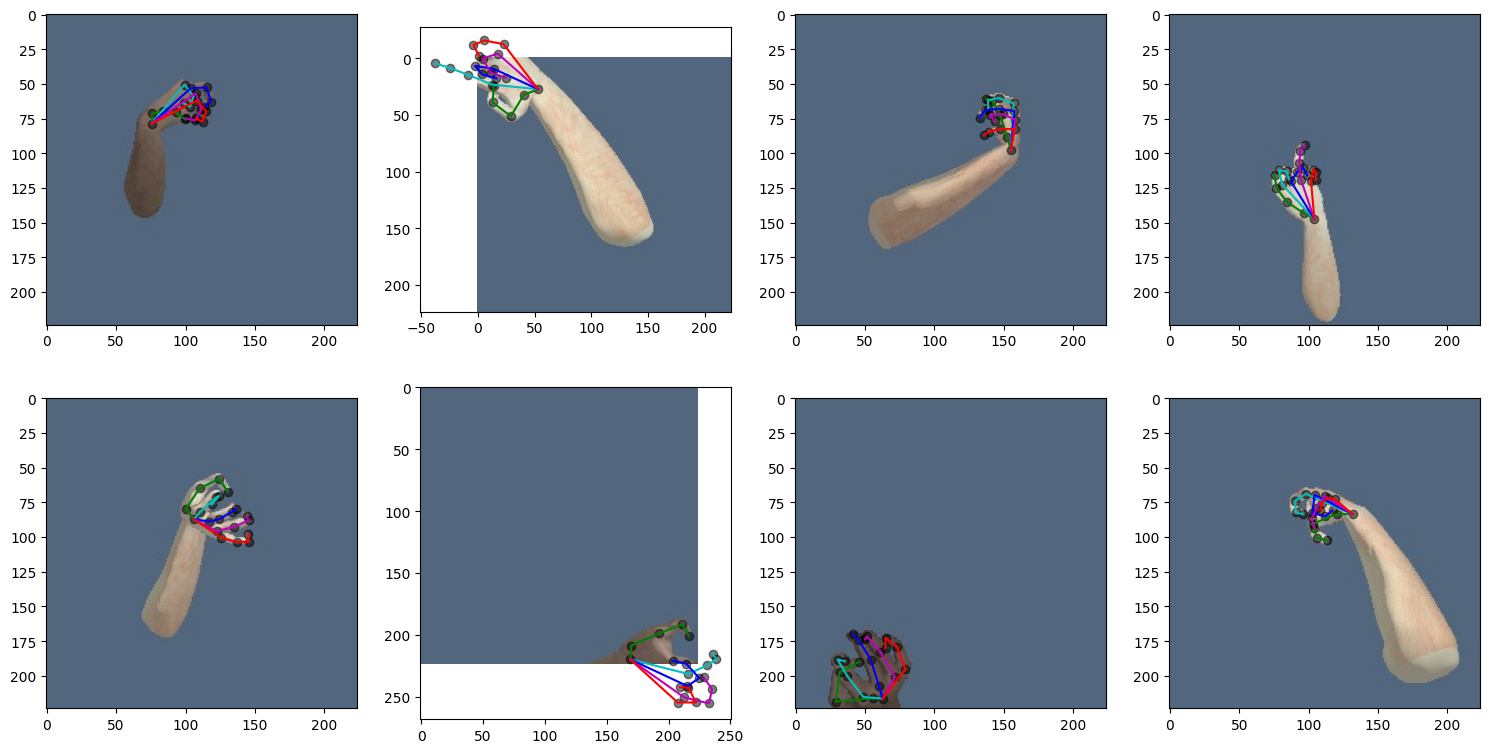

In [6]:
# visualize random batch of data train samples + labels
show_data(train_dataset, n_samples=8)

## Model

In [7]:
model = ShallowUNet(NUM_OF_CHANNELS, NUM_OF_KEYPOINTS)
model = model.to(config["device"])

criterion = IoULoss()
optimizer = optim.SGD(model.parameters(), lr=config["learning_rate"])
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer=optimizer, factor=0.5, patience=20, verbose=True, threshold=0.00001
)

In [8]:
trainer = Trainer(model, criterion, optimizer, config, scheduler)
model = trainer.train(train_dataloader, val_dataloader)

Epoch: 1/1000, Train Loss=0.9934818149, Val Loss=0.9935397023
Epoch: 2/1000, Train Loss=0.9933401837, Val Loss=0.9935008571
Epoch: 3/1000, Train Loss=0.9932453761, Val Loss=0.9933917466
Epoch: 4/1000, Train Loss=0.9929801506, Val Loss=0.9932932825
Epoch: 5/1000, Train Loss=0.9928548675, Val Loss=0.9930707387
Epoch: 6/1000, Train Loss=0.9925746403, Val Loss=0.9928043825
Epoch: 7/1000, Train Loss=0.9923465638, Val Loss=0.9924558884
Epoch: 8/1000, Train Loss=0.9919824998, Val Loss=0.9923120737
Epoch: 9/1000, Train Loss=0.9915365133, Val Loss=0.99216187
Epoch: 10/1000, Train Loss=0.9910227586, Val Loss=0.9915322321
Epoch: 11/1000, Train Loss=0.9902915359, Val Loss=0.9901599402
Epoch: 12/1000, Train Loss=0.9893596558, Val Loss=0.9892669434
Epoch: 13/1000, Train Loss=0.9882399171, Val Loss=0.9877658458
Epoch: 14/1000, Train Loss=0.9868831658, Val Loss=0.9855442927
Epoch: 15/1000, Train Loss=0.9847231589, Val Loss=0.9812229957
Epoch: 16/1000, Train Loss=0.9803566161, Val Loss=0.9741294838
Epo

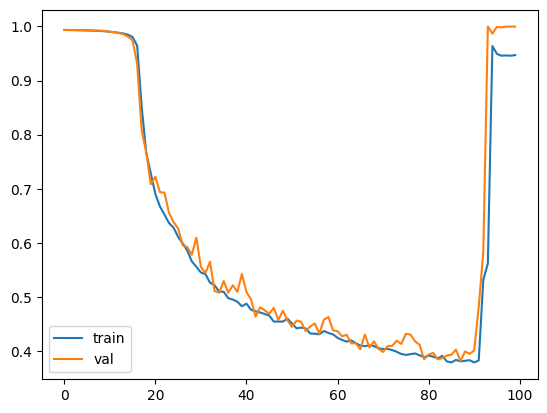

In [9]:
import matplotlib.pyplot as plt
plt.plot(trainer.loss["train"], label="train")
plt.plot(trainer.loss["val"], label="val")
plt.legend()
plt.show()